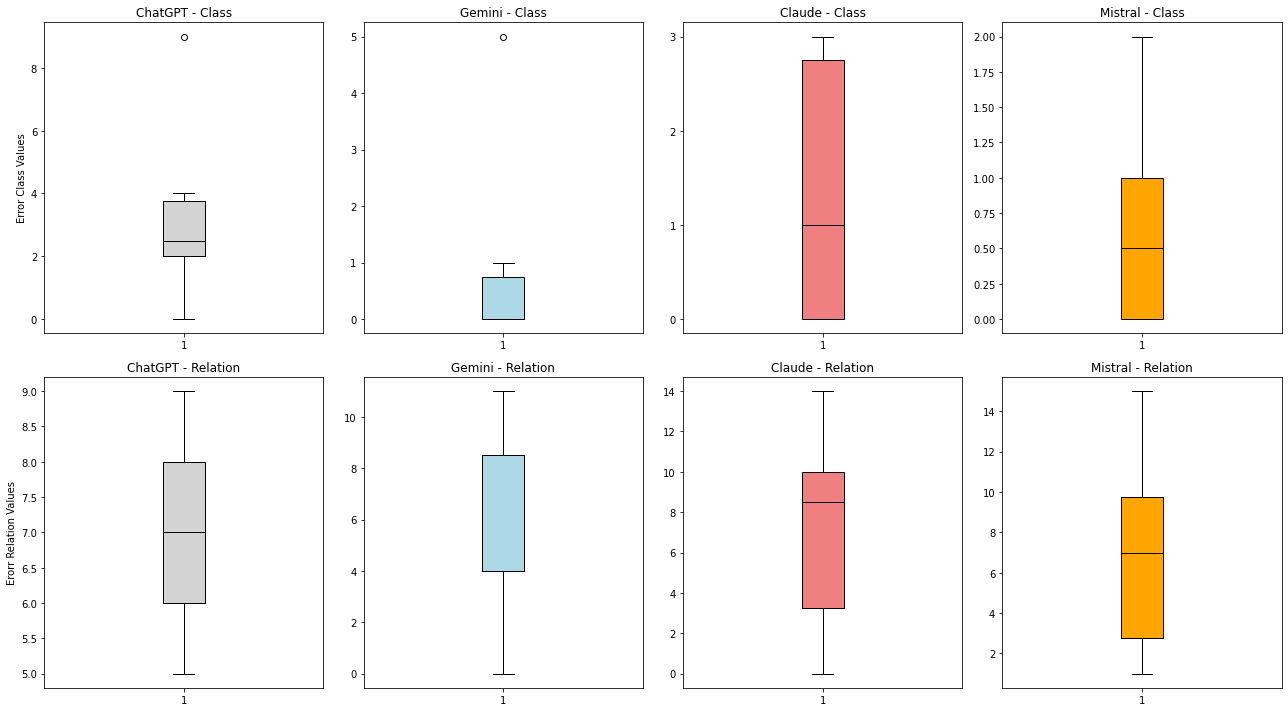

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

file_path = 'Class_Rel_Analysis.xlsx'
excel_data = pd.ExcelFile(file_path)

chatgpt_df = excel_data.parse('ChatGPT')
gemini_df = excel_data.parse('Gemini')
claude_df = excel_data.parse('Claude')
mistral_df = excel_data.parse('Mistral')

colors = {
    'ChatGPT': 'lightgray',
    'Gemini': 'lightblue',
    'Claude': 'lightcoral',
    'Mistral': 'orange'
}

fig, axs = plt.subplots(2, 4, figsize=(18, 10))

axs[0, 0].boxplot(chatgpt_df['Class'], patch_artist=True,
                  boxprops=dict(facecolor=colors['ChatGPT']),
                  medianprops=dict(color='black'))
axs[0, 0].set_title('ChatGPT - Class')
axs[0, 0].set_ylabel('Error Class Values')

axs[0, 1].boxplot(gemini_df['Class'], patch_artist=True, boxprops=dict(facecolor=colors['Gemini']), medianprops=dict(color='black'))
axs[0, 1].set_title('Gemini - Class')

axs[0, 2].boxplot(claude_df['Class'], patch_artist=True, boxprops=dict(facecolor=colors['Claude']),medianprops=dict(color='black'))
axs[0, 2].set_title('Claude - Class')
axs[0, 2].yaxis.set_major_locator(MaxNLocator(integer=True))

axs[0, 3].boxplot(mistral_df['Class'], patch_artist=True, boxprops=dict(facecolor=colors['Mistral']), medianprops=dict(color='black'))
axs[0, 3].set_title('Mistral - Class')

axs[1, 0].boxplot(chatgpt_df['Relationships '], patch_artist=True, boxprops=dict(facecolor=colors['ChatGPT']), medianprops=dict(color='black'))
axs[1, 0].set_title('ChatGPT - Relation')
axs[1, 0].set_ylabel('Erorr Relation Values')

axs[1, 1].boxplot(gemini_df['Relationships '], patch_artist=True, boxprops=dict(facecolor=colors['Gemini']), medianprops=dict(color='black'))
axs[1, 1].set_title('Gemini - Relation')

axs[1, 2].boxplot(claude_df['Relationships '], patch_artist=True, boxprops=dict(facecolor=colors['Claude']), medianprops=dict(color='black'))
axs[1, 2].set_title('Claude - Relation')

axs[1, 3].boxplot(mistral_df['Relationships '], patch_artist=True, boxprops=dict(facecolor=colors['Mistral']), medianprops=dict(color='black'))
axs[1, 3].set_title('Mistral - Relation')

plt.tight_layout()

output_file_path = 'box_plots_combined.png'
plt.savefig(output_file_path, format='png')

plt.show()


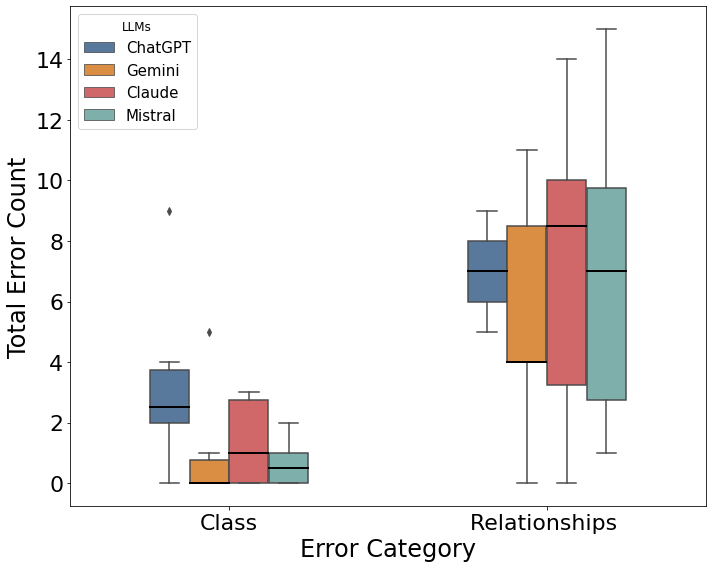

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'Class_Rel_Analysis.xlsx'
excel_data = pd.ExcelFile(file_path)

# Prepare a combined DataFrame for plotting
combined_data = pd.DataFrame()

# Loop through each sheet and add the data to the combined DataFrame
for sheet in ['ChatGPT', 'Gemini', 'Claude', 'Mistral']:
    df = excel_data.parse(sheet)
    # Adding a column to indicate the sheet name (source) for each row
    df['Source'] = sheet
    combined_data = pd.concat([combined_data, df[['Class', 'Relationships ', 'Source']]])

# Melt the combined data for easier box plotting
melted_data = pd.melt(combined_data, id_vars='Source', value_vars=['Class', 'Relationships '],
                      var_name='Metric', value_name='Value')

# Define custom color mapping for each source
color_palette = {
    'ChatGPT': '#4E79A7',
    'Gemini': '#F28E2B',
    'Claude': '#E15759',
    'Mistral': '#76B7B2'
}



# Plotting with custom colors, thinner boxes, and increased intra-group spacing
plt.figure(figsize=(10, 8))
sns.boxplot(data=melted_data, x='Metric', y='Value', hue='Source', width=0.5, dodge='True',
            palette=color_palette, medianprops={"color": "black", "linewidth": 2})
#plt.title("Combined Box Plot for 'Class' and 'Relation' Across All Sources with Incresed Intra-group Spacing")
plt.ylabel("Total Error Count", fontsize=24)
plt.xlabel("Error Category", fontsize=24)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(title="LLMs", fontsize = 15, title_fontsize=12)
#plt.show()

plt.tight_layout()

output_file_path = 'box_plots_Class_Rel.png'
plt.savefig(output_file_path, format='png')

plt.show()
